In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
import branca

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/joanamontserrat/indrods/refs/heads/main/Base_Limpia%20(1).csv')
df

,Año,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Sexo/Averiguación previa,Rango de edad
0,2015.0,Aguascalientes,La libertad y la seguridad sexual,La libertad y la seguridad sexual,Abuso sexual,Abuso sexual,6.0,4.0,0.000000,2.000000,1.000000,1.0,1.0,1.0,0.0,0.000000,1.00000,1.000000,Averiguación previa,No Especificado
1,2015.0,Aguascalientes,La libertad y la seguridad sexual,La libertad y la seguridad sexual,Acoso sexual,Acoso sexual,0.0,0.0,18.528262,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,Averiguación previa,No Especificado
2,2015.0,Aguascalientes,La libertad y la seguridad sexual,La libertad y la seguridad sexual,Hostigamiento sexual,Hostigamiento sexual,1.0,1.0,0.000000,1.000000,3.000000,0.0,1.0,0.0,0.0,1.000000,17.21809,3.000000,Averiguación previa,No Especificado
3,2015.0,Aguascalientes,La libertad y la seguridad sexual,La libertad y la seguridad sexual,Violación simple,Violación simple,5.0,5.0,3.000000,11.000000,3.000000,15.0,8.0,8.0,6.0,9.000000,5.00000,6.000000,Averiguación previa,No Especificado
4,2015.0,Aguascalientes,La libertad y la seguridad sexual,La libertad y la seguridad sexual,Violación equiparada,Violación equiparada,0.0,5.0,3.000000,7.000000,3.000000,4.0,4.0,4.0,3.0,5.000000,3.00000,0.000000,Averiguación previa,No Especificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96989,2018.0,Baja California,La vida y la Integridad corporal,La vida y la Integridad corporal,Lesiones culposas,Con otro elemento,1.0,0.0,0.000000,0.000000,17.931732,0.0,0.0,0.0,0.0,0.000000,0.00000,2.000000,Hombre,Menores de edad (0-17)
96990,2021.0,Zacatecas,La vida y la Integridad corporal,La vida y la Integridad corporal,Feminicidio,No especificado,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,18.302228,0.00000,0.000000,Mujer,Menores de edad (0-17)
96991,2016.0,Guerrero,La vida y la Integridad corporal,La vida y la Integridad corporal,Homicidio culposo,Con arma blanca,0.0,0.0,1.000000,17.013859,0.000000,0.0,0.0,2.0,1.0,0.000000,0.00000,0.000000,Hombre,No especificado
96992,2021.0,Hidalgo,La vida y la Integridad corporal,La vida y la Integridad corporal,Lesiones dolosas,Con arma blanca,0.0,0.0,5.000000,0.000000,0.000000,1.0,1.0,2.0,0.0,1.000000,0.00000,16.463015,Mujer,No especificado


In [ ]:
df['Entidad'] = df['Entidad'].replace('invalid', 'Desconocido')
df['Año'] = df['Año'].replace('invalid', '0000')
df['Bien jurídico afectado'] = df['Bien jurídico afectado'].replace('invalid', 'Desconocido')
df['Tipo de delito'] = df['Tipo de delito'].replace('invalid', 'Desconocido')
df['Subtipo de delito'] = df['Subtipo de delito'].replace('invalid', 'Desconocido')
df['Modalidad'] = df['Modalidad'].replace('invalid', 'No especificado')
df['Modalidad'] = df['Modalidad'].replace('No Especificado', 'No especificado')
df['Rango de edad'] = df['Rango de edad'].replace('invalid', 'No Especificado')
df['Rango de edad'] = df['Rango de edad'].replace('No identificado', 'No Especificado')
df['Rango de edad'] = df['Rango de edad'].replace('No especificado', 'No Especificado')
df['Sexo/Averiguación previa'] = df['Sexo/Averiguación previa'].replace('No Identificado', 'Averiguación previa')
df['Sexo/Averiguación previa'] = df['Sexo/Averiguación previa'].replace('invalid', 'Averiguación previa')
df['Sexo/Averiguación previa'] = df['Sexo/Averiguación previa'].replace('No identificado', 'Averiguación previa')

In [ ]:
# Mostrar un resumen general del dataset

print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 96994
Número de variables: 20


In [ ]:
# Clasificaremos cada columna
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_fechas = df.select_dtypes(include=['datetime64']).columns.tolist()

print("Variables categóricas:", variables_categoricas)
print("Variables numéricas:", variables_numericas)
print("Variables de fecha:", variables_fechas)

Variables categóricas: ['Año', 'Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Sexo/Averiguación previa', 'Rango de edad']
Variables numéricas: ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
Variables de fecha: []


In [ ]:
# Resumen estadístico de variables numéricas sin decimales
print("\nResumen estadístico de variables numéricas (sin decimales):")
print(df[variables_numericas].describe().astype(int))  # Convierte a enteros

# Frecuencia de valores en variables categóricas
print("\nFrecuencia de valores en variables categóricas:")
for col in variables_categoricas:
    print(f"\n{col}:\n{df[col].value_counts()}")


Resumen estadístico de variables numéricas (sin decimales):
       Enero  Febrero  Marzo  Abril   Mayo  Junio  Julio  Agosto  Septiembre  \
count  96994    96994  96994  96994  96994  96994  96994   96994       96994   
mean      16       16     18     17     18     18     17      18          17   
std      104      105    117    108    108    112    103     107         101   
min        0        0      0      0      0      0      0       0           0   
25%        0        0      0      0      0      0      0       0           0   
50%        0        0      0      0      0      0      0       0           0   
75%        3        3      3      3      3      3     14      15          15   
max     7565     7888   8418   7916   6856   7386   7619    7955        7805   

       Octubre  Noviembre  Diciembre  
count    96994      96994      96994  
mean        18         17         16  
std        106        102         93  
min          0          0          0  
25%          0         

In [ ]:
# Imprimir los primeros 5 registros del DataFrame
print(df.head())
print(df.dtypes)
print(df.columns)

      Año         Entidad             Bien jurídico afectado  \
0  2015.0  Aguascalientes  La libertad y la seguridad sexual   
1  2015.0  Aguascalientes  La libertad y la seguridad sexual   
2  2015.0  Aguascalientes  La libertad y la seguridad sexual   
3  2015.0  Aguascalientes  La libertad y la seguridad sexual   
4  2015.0  Aguascalientes  La libertad y la seguridad sexual   

                      Tipo de delito     Subtipo de delito  \
0  La libertad y la seguridad sexual          Abuso sexual   
1  La libertad y la seguridad sexual          Acoso sexual   
2  La libertad y la seguridad sexual  Hostigamiento sexual   
3  La libertad y la seguridad sexual      Violación simple   
4  La libertad y la seguridad sexual  Violación equiparada   

              Modalidad  Enero  Febrero      Marzo  Abril  Mayo  Junio  Julio  \
0          Abuso sexual    6.0      4.0   0.000000    2.0   1.0    1.0    1.0   
1          Acoso sexual    0.0      0.0  18.528262    0.0   0.0    0.0    0.0   

Aqui empezamos

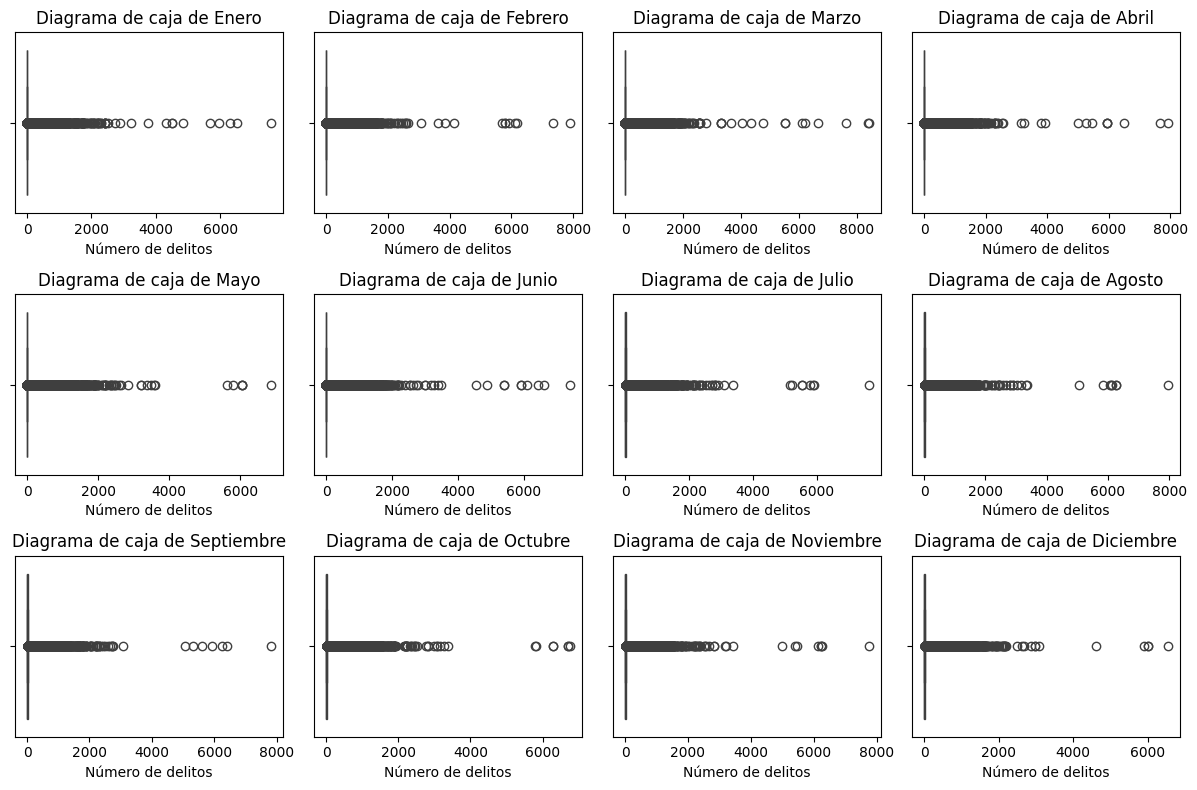

In [ ]:
# para evitar problemas al generar las gráficas
columnas_a_reemplazar = ['Entidad', 'Año', 'Bien jurídico afectado', 'Tipo de delito',
                         'Subtipo de delito', 'Modalidad', 'Rango de edad',
                         'Sexo/Averiguación previa']

for columna in columnas_a_reemplazar:
    df[columna] = df[columna].replace('invalid', 'Desconocido')

# Reemplazar otros valores problemáticos en columnas específicas
df['Modalidad'] = df['Modalidad'].replace('No Especificado', 'No especificado')
df['Rango de edad'] = df['Rango de edad'].replace(['No identificado', 'No especificado'], 'No Especificado')
df['Sexo/Averiguación previa'] = df['Sexo/Averiguación previa'].replace(['No Identificado', 'No identificado'], 'Averiguación previa')


# Definir las columnas que representan los meses
columnas_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                  'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear la figura para los boxplots
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura si es necesario

# Iterar sobre los meses y crear un boxplot para cada uno
for i, mes in enumerate(columnas_meses, 1):
    plt.subplot(3, 4, i)  # Dividir la figura en una cuadrícula de 3x4

    # Asegurarse de que los datos de la columna sean numéricos
    # Si no lo son, convertirlos a numéricos (puede haber errores si hay datos no numéricos)
    df[mes] = pd.to_numeric(df[mes], errors='coerce')

    sns.boxplot(x=df[mes])  # Crear el boxplot con Seaborn
    plt.title(f'Diagrama de caja de {mes}')  # Título del boxplot
    plt.xlabel('Número de delitos') # Etiqueta del eje x

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura con los boxplots
plt.show()

In [ ]:
# Calcular el total de delitos por mes
delitos_mensuales = df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()

# Convertir la serie a un DataFrame
delitos_mensuales = pd.DataFrame(delitos_mensuales, columns=['Total Delitos']).reset_index()
delitos_mensuales.rename(columns={'index': 'Mes'}, inplace=True)

# Crear la gráfica de línea
fig = px.line(delitos_mensuales, x='Mes', y='Total Delitos',
              labels={'x': 'Mes', 'y': 'Número de delitos'},
              title='Delitos mensuales en México',
              color_discrete_sequence=['deeppink'])
fig.show()

In [ ]:
# Sumar los delitos de todos los meses para cada registro
df['Total_Delitos_Año'] = df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)

# Lista de años únicos en la base de datos
años_unicos = df['Año'].unique()

# Generar un gráfico por cada año
for año in años_unicos:
    # Filtrar los datos para el año actual
    df_año = df[df['Año'] == año]

    # Agrupar los delitos por entidad
    delitos_por_entidad = df_año.groupby('Entidad')['Total_Delitos_Año'].sum().reset_index()

    # Crear la gráfica
    fig = px.bar(
        delitos_por_entidad,
        x='Entidad',
        y='Total_Delitos_Año',
        labels={'Entidad': 'Entidad', 'Total_Delitos_Año': 'Número de Delitos'},
        title=f'Total de crímenes por entidad en {año}',
        text='Total_Delitos_Año',
        color_discrete_sequence=['pink']
    )

    # Mejorar la visualización
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(
        yaxis=dict(title='Número de Delitos'),
        xaxis=dict(title='Entidad', tickangle=-45),
        uniformtext_minsize=8, uniformtext_mode='hide'
    )

    # Mostrar el gráfico para el año actual
    fig.show()



In [ ]:
# Calcular el total anual por tipo de delito
conteo_delitos = df.groupby('Tipo de delito')[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()

conteo_delitos['Total'] = conteo_delitos.sum(axis=1)

# Ordenar de mayor a menor
conteo_delitos = conteo_delitos[['Total']].sort_values(by='Total', ascending=False)

# Gráfica de barras interactiva con plotly.express y colores personalizados
fig = px.bar(conteo_delitos,
             x=conteo_delitos.index,
             y='Total',
             title='Conteo total de tipos de delitos en México (de mayor a menor)',
             labels={'x': 'Tipo de delito', 'y': 'Número total de delitos'},
             color='Total',  # Color basado en el total de delitos
             color_continuous_scale=px.colors.sequential.Pinkyl_r)  # Escala de colores rosa

fig.update_layout(xaxis_tickangle=-45)  # Rotar etiquetas del eje x
fig.show()

In [ ]:
# Sumar los delitos por entidad
delitos_por_estado = df.groupby('Entidad')[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                              'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
delitos_por_estado['Total'] = delitos_por_estado.sum(axis=1)
delitos_por_estado = delitos_por_estado.sort_values(by='Total', ascending=False).reset_index()
# Grafica de barras
fig = px.bar(delitos_por_estado, x='Total', y='Entidad', orientation='h',
             labels={'Total': 'Número de delitos', 'Entidad': 'Estado'},
                          title='Total de delitos por estado', color='Total',
                                       color_continuous_scale='Pinkyl')
fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show() # Corrected indentation

In [ ]:
# Agrupar por estado y tipo de delito, y sumar los delitos
estado_delito_suma = df.groupby(['Entidad', 'Tipo de delito'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
estado_delito_suma['Total'] = estado_delito_suma.sum(axis=1)
estado_delito_suma = estado_delito_suma.reset_index()

# Gráfica interactiva apilada
fig = px.bar(estado_delito_suma, x='Entidad', y='Total', color='Tipo de delito',
             labels={'Total': 'Número de delitos', 'Entidad': 'Estado', 'Tipo de delito': 'Tipo de delito'},
             title='Delitos por estado y tipo (barras apiladas)')

# Ajustes para mejorar la visualización:
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder': 'total ascending'},
    xaxis_tickangle=-45,
    width=1200,
    height=600
)

fig.show()

In [ ]:
# Sumar delitos mensuales por estado
delitos_mensuales_estado = df.groupby('Entidad')[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
delitos_mensuales_estado = delitos_mensuales_estado.T
delitos_mensuales_estado['Mes'] = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Convertir a formato largo
delitos_mensuales_estado = delitos_mensuales_estado.melt(id_vars='Mes', var_name='Entidad', value_name='Delitos')

# Gráfica de líneas
fig = px.line(delitos_mensuales_estado, x='Mes', y='Delitos', color='Entidad',
              labels={'Mes': 'Mes', 'Delitos': 'Número de delitos', 'Entidad': 'Estado'},
              title='Tendencias mensuales de delitos por estado')
fig.update_traces(mode='lines+markers')
fig.show()

In [ ]:
# Porcentajes
# Calcular el total de delitos por mes (asumiendo que df tiene columnas para cada mes)
delitos_totales_mes = df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()

delitos_porcentuales = (delitos_totales_mes / delitos_totales_mes.sum()) * 100
delitos_porcentuales.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                              'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Grafica de pastel
fig = px.pie(values=delitos_porcentuales.values, names=delitos_porcentuales.index,
             title='Contribución porcentual de los delitos por mes', hole=0.3)
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
# Agrupar por sexo y sumar
delitos_por_sexo = df.groupby('Sexo/Averiguación previa')[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                             'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
delitos_por_sexo['Total'] = delitos_por_sexo.sum(axis=1)

# Crear gráfica interactiva
fig = px.pie(values=delitos_por_sexo['Total'], names=delitos_por_sexo.index,
             title='Proporción de delitos por sexo', hole=0.4)
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:

# Agrupar los datos por Modalidad y Sexo y sumar los delitos
modalidad_delitos_por_sexo = df.groupby(['Modalidad', 'Sexo/Averiguación previa'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                                                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
modalidad_delitos_por_sexo['Total'] = modalidad_delitos_por_sexo.sum(axis=1)
modalidad_delitos_por_sexo = modalidad_delitos_por_sexo.reset_index()

# Obtener las 20 modalidades más frecuentes
top_20_modalidades = modalidad_delitos_por_sexo.groupby('Modalidad')['Total'].sum().nlargest(20).index

# Filtrar el DataFrame para incluir solo las 20 modalidades principales
modalidad_delitos_por_sexo_top20 = modalidad_delitos_por_sexo[modalidad_delitos_por_sexo['Modalidad'].isin(top_20_modalidades)]

# Gráfica apilada de barras con las 20 modalidades principales
fig = px.bar(modalidad_delitos_por_sexo_top20,
             x='Modalidad',
             y='Total',
             color='Sexo/Averiguación previa',
             barmode='stack',
             labels={'Total': 'Número de delitos', 'Modalidad': 'Modalidad', 'Sexo/Averiguación previa': 'Sexo'},
             title='Delitos por Modalidad y Sexo (Top 20 Modalidades, Gráfica Apilada)')
fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()

In [ ]:
# @title Texto de título predeterminado
# Agrupar por rango de edad y sumar
delitos_por_edad = df.groupby('Rango de edad')[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                  'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
delitos_por_edad['Total'] = delitos_por_edad.sum(axis=1)

# Crear gráfica interactiva con colores morados
fig = px.bar(delitos_por_edad.reset_index(), x='Rango de edad', y='Total',
             labels={'Rango de edad': 'Rango de Edad', 'Total': 'Número de Delitos'},
             title='Delitos por Rango de Edad', color='Total',
             color_continuous_scale=px.colors.sequential.Pinkyl)
fig.update_layout(xaxis_categoryorder='total ascending')
fig.show()

In [ ]:
# Agrupar por estado y tipo de delito
delitos_estado_tipo = df.groupby(['Entidad', 'Tipo de delito'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
delitos_estado_tipo['Total'] = delitos_estado_tipo.sum(axis=1)
delitos_estado_tipo = delitos_estado_tipo.reset_index()

# Crear gráfica con ajustes para mejorar la visualización
fig = px.scatter(delitos_estado_tipo,
                 x='Entidad',
                 y='Tipo de delito',
                 size='Total',
                 color='Total',
                 labels={'Total': 'Número de delitos', 'Entidad': 'Estado', 'Tipo de delito': 'Tipo de Delito'},
                 title='Relación entre tipos de delitos y estados',
                 size_max=40,
                 color_continuous_scale=px.colors.sequential.Pinkyl_r)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    xaxis={'categoryorder': 'total descending'}
)

fig.show()

In [ ]:
# Definir un diccionario con las coordenadas geográficas de cada estado de México
estados_coords = {
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.6245, -115.4523],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Chiapas": [16.7569, -93.1292],
    "Chihuahua": [28.6329, -106.0691],
    "Ciudad de México": [19.4326, -99.1332],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.1223, -104.0072],
    "Durango": [24.0277, -104.6532],
    "Guanajuato": [21.0190, -101.2574],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.0911, -98.7624],
    "Jalisco": [20.6597, -103.3496],
    "México": [19.3553, -99.6308],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.5922, -99.9962],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1565, -100.9855],
    "Sinaloa": [24.8071, -107.3940],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7417, -99.1455],
    "Tlaxcala": [19.3182, -98.2375],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.7099, -89.0943],
    "Zacatecas": [22.7709, -102.5832],
}

# Vamos a agrupar los delitos por estado y sumar los valores de cada mes
delitos_por_estado = df.groupby('Entidad')[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                              'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
delitos_por_estado['Total'] = delitos_por_estado.sum(axis=1)
delitos_por_estado = delitos_por_estado.reset_index()

# Definir un mapa base centrado en México
mapa = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Crear una escala de colores basada en los valores de los delitos
vmin = delitos_por_estado['Total'].min()
vmax = delitos_por_estado['Total'].max()
colormap = branca.colormap.linear.YlOrRd_09.scale(vmin, vmax)

# Añadir la escala de colores al mapa
colormap.caption = 'Total de Delitos por Estado'
colormap.add_to(mapa)

# Función para controlar el tamaño de los círculos
def ajustar_tamano_circulo(total_delitos):
    # Ajuste de tamaño proporcional
    # El valor 30 es el tamaño máximo de los círculos
    tamaño_base = total_delitos / 5000
    tamaño_ajustado = max(5, min(tamaño_base, 30))
    return tamaño_ajustado

# Añadir un marcador para cada estado con un círculo proporcional al total de delitos
for index, row in delitos_por_estado.iterrows():
    estado = row['Entidad']
    total_delitos = row['Total']
    coords = estados_coords.get(estado)
    if coords:
        folium.CircleMarker(
            location=coords,
            radius=ajustar_tamano_circulo(total_delitos),
            color=colormap(total_delitos),
            fill=True,
            fill_color=colormap(total_delitos),
            fill_opacity=0.6,
            popup=f"<strong>{estado}</strong><br>Total de delitos: {total_delitos}",
        ).add_to(mapa)

# Guardar el mapa interactivo como un archivo HTML
mapa.save("mapa_delitos_mexico_ajustado.html")
mapa

In [ ]:
df['Entidad'].unique()

array(['Aguascalientes', 'Desconocido', 'Baja California',
       'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
       'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [ ]:

# Agrupar los datos por Año y sumar los delitos de cada mes
df_año = df.groupby('Año')[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',
                            'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()
df_año['Total'] = df_año.sum(axis=1)  # Sumar los delitos a lo largo del año
df_año = df_año.reset_index()

# Crear gráfico de barras interactivo para el total de delitos por año
fig = px.bar(df_año, x='Año', y='Total', title='Total de Delitos por Año',
             labels={'Total': 'Número de Delitos', 'Año': 'Año'}, color='Año', text='Total')
fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()

In [ ]:
# Agrupar los datos por Año y Tipo de Delito
df_año_delito = df.groupby(['Año', 'Tipo de delito'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                     'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()

df_año_delito['Total'] = df_año_delito.sum(axis=1)
df_año_delito = df_año_delito.reset_index()

# Gráfico de barras apiladas de delitos por Año y Tipo de Delito
fig = px.bar(df_año_delito, x='Año', y='Total', color='Tipo de delito', barmode='stack',
             title='Distribución de Delitos por Año y Tipo de Delito',
             labels={'Total': 'Número de Delitos', 'Año': 'Año', 'Tipo de delito': 'Tipo de Delito'})
fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()

In [ ]:
# Agrupar los datos por Año y Modalidad
df_año_modalidad = df.groupby(['Año', 'Modalidad'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                                                    'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()

# Sumar los delitos de todos los meses para obtener el total del año por modalidad
df_año_modalidad['Total'] = df_año_modalidad.sum(axis=1)

# Restablecer el índice para que 'Año' y 'Modalidad' sean columnas
df_año_modalidad = df_año_modalidad.reset_index()

# **Aquí se agrega el filtro para las 20 modalidades más comunes**
top_20_modalidades = df_año_modalidad.groupby('Modalidad')['Total'].sum().nlargest(20).index
df_año_modalidad = df_año_modalidad[df_año_modalidad['Modalidad'].isin(top_20_modalidades)]

# Gráfico de barras apiladas de delitos por Año y Modalidad (Top 20)
fig = px.bar(
    df_año_modalidad,
    x='Año',
    y='Total',
    color='Modalidad',
    barmode='stack',
    title='Distribución de Delitos por Año y Modalidad (Top 20)',
    labels={'Total': 'Número de Delitos', 'Año': 'Año', 'Modalidad': 'Modalidad'}
)

# Ajustar el diseño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    height=600
)

# Mostrar el gráfico
fig.show()

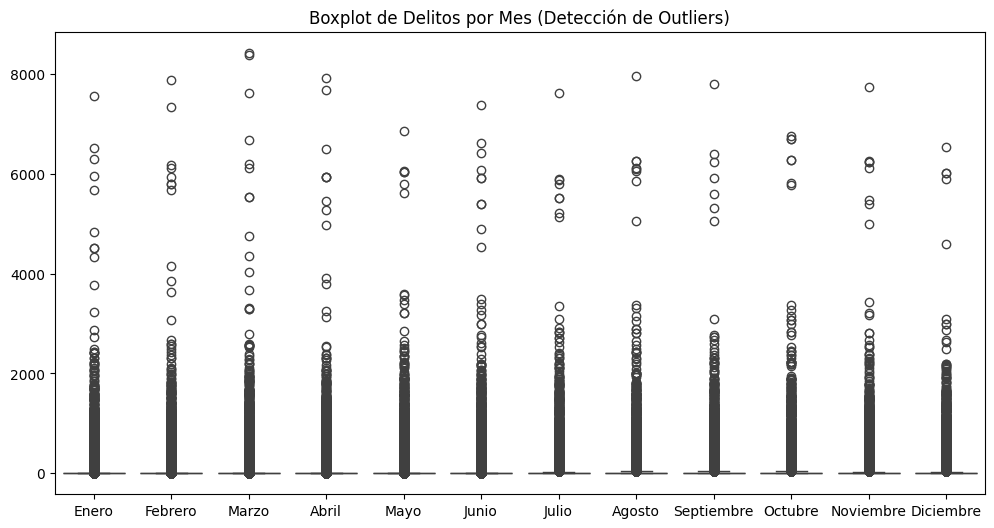

Número de outliers por variable:
 Enero         18409
Febrero       18513
Marzo         19134
Abril         18609
Mayo          19013
Junio         18902
Julio          6044
Agosto         6009
Septiembre     5938
Octubre        6121
Noviembre      6126
Diciembre      5899
dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas numéricas (por ejemplo, los meses de enero a diciembre)
variables_numericas = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',
                       'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Calcular el IQR para detectar outliers
Q1 = df[variables_numericas].quantile(0.25)
Q3 = df[variables_numericas].quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = ((df[variables_numericas] < limite_inferior) | (df[variables_numericas] > limite_superior))

# Boxplot para visualización de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[variables_numericas])
plt.title('Boxplot de Delitos por Mes (Detección de Outliers)')
plt.show()

# Ver los valores que son outliers
outliers_count = outliers.sum()
print("Número de outliers por variable:\n", outliers_count)